In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset = np.load("nyc_taxi_data.npy", allow_pickle=True).item()
X_train, y_train, X_test, y_test = dataset["X_train"], dataset["y_train"], dataset["X_test"], dataset["y_test"]
df = X_train

In [18]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
879655,id2425795,1,2016-01-08 23:55:11,2016-01-09 00:04:32,1,-73.955551,40.773346,-73.973640,40.763500,N
646838,id0767831,2,2016-03-05 09:52:06,2016-03-05 10:00:12,1,-73.962181,40.763599,-73.980377,40.764919,N
1138713,id0449104,1,2016-04-09 16:03:53,2016-04-09 16:21:22,1,-73.977486,40.751842,-74.011688,40.718925,N
864716,id3030157,1,2016-01-06 11:12:44,2016-01-06 11:19:49,1,-73.970001,40.762363,-73.963264,40.774666,N
434927,id1584885,1,2016-06-26 09:10:56,2016-06-26 09:17:44,1,-73.950348,40.771561,-73.968178,40.762409,N


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312779 entries, 879655 to 121958
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1312779 non-null  object 
 1   vendor_id           1312779 non-null  int64  
 2   pickup_datetime     1312779 non-null  object 
 3   dropoff_datetime    1312779 non-null  object 
 4   passenger_count     1312779 non-null  int64  
 5   pickup_longitude    1312779 non-null  float64
 6   pickup_latitude     1312779 non-null  float64
 7   dropoff_longitude   1312779 non-null  float64
 8   dropoff_latitude    1312779 non-null  float64
 9   store_and_fwd_flag  1312779 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 110.2+ MB


In [20]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06,1.312779e+06
mean,1.534878e+00,1.664126e+00,-7.397350e+01,4.075093e+01,-7.397342e+01,4.075181e+01
std,4.987823e-01,1.313950e+00,7.351224e-02,3.291198e-02,7.316118e-02,3.579324e-02
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073589e+01
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075453e+01
75%,2.000000e+00,2.000000e+00,-7.396734e+01,4.076835e+01,-7.396302e+01,4.076980e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01


In [21]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

There are no null values in the dataset

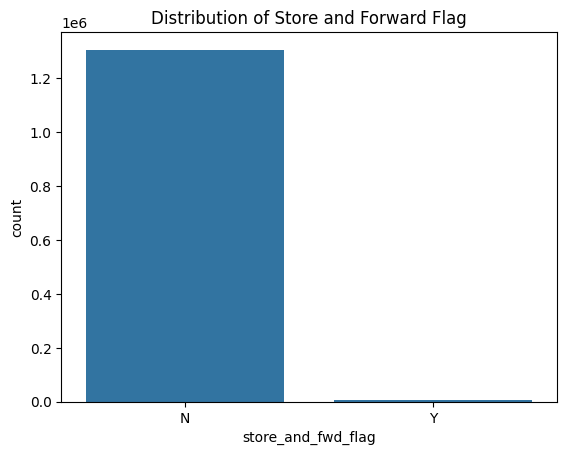

In [22]:
sns.countplot(x='store_and_fwd_flag', data=df)
plt.title('Distribution of Store and Forward Flag')
plt.show()

The above plot gives the countplot of the store_and_fwd flag feature. This feature doesn't directly related to any other features. It is a binary feature with values as Y/N.

Passenger Count plot

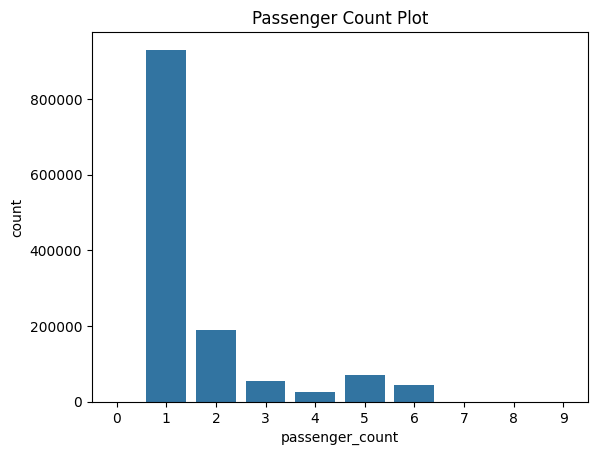

In [23]:
sns.countplot(x='passenger_count', data=df)
plt.title('Passenger Count Plot')
plt.show()

The passenger count feature can help understand the passenger's preferences like if they prioritize privacy and luxury over saving money by sharing the rides.

Converting datetime features to datetime objects for pickup and dropoff times. we take day,hour,month form the datetime features.

In [24]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_day_of_week'] = df['dropoff_datetime'].dt.dayofweek
df['dropoff_month'] = df['dropoff_datetime'].dt.month

Plots for pickup time features.

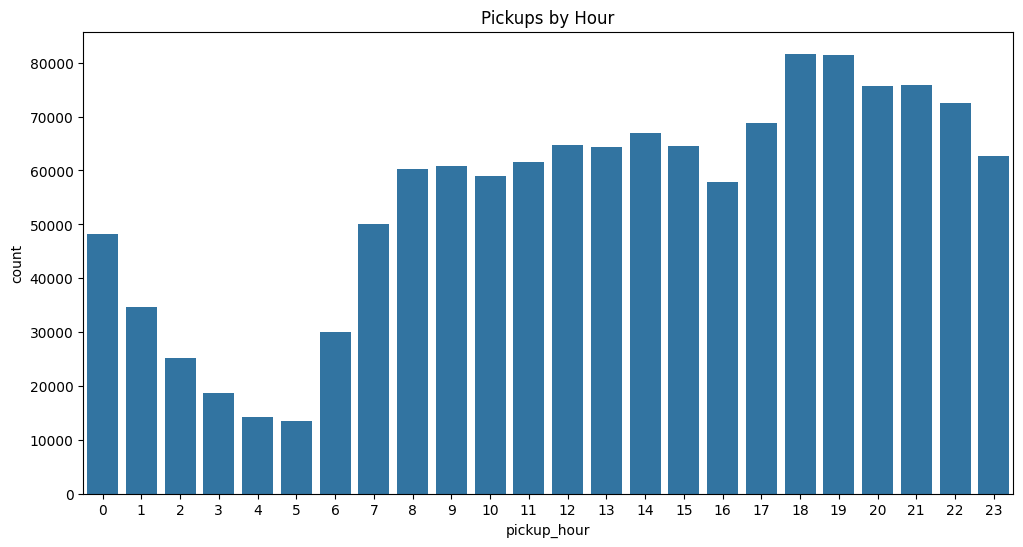

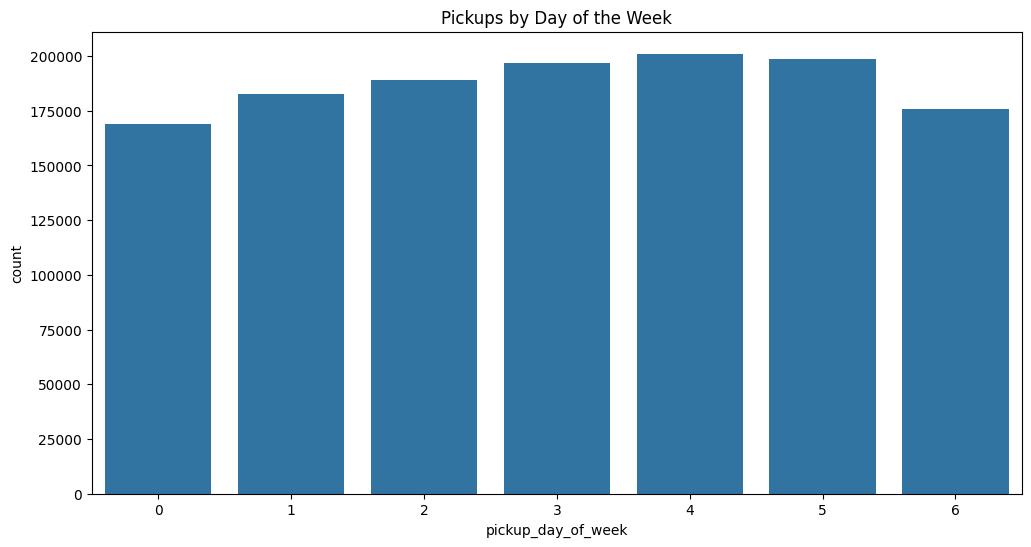

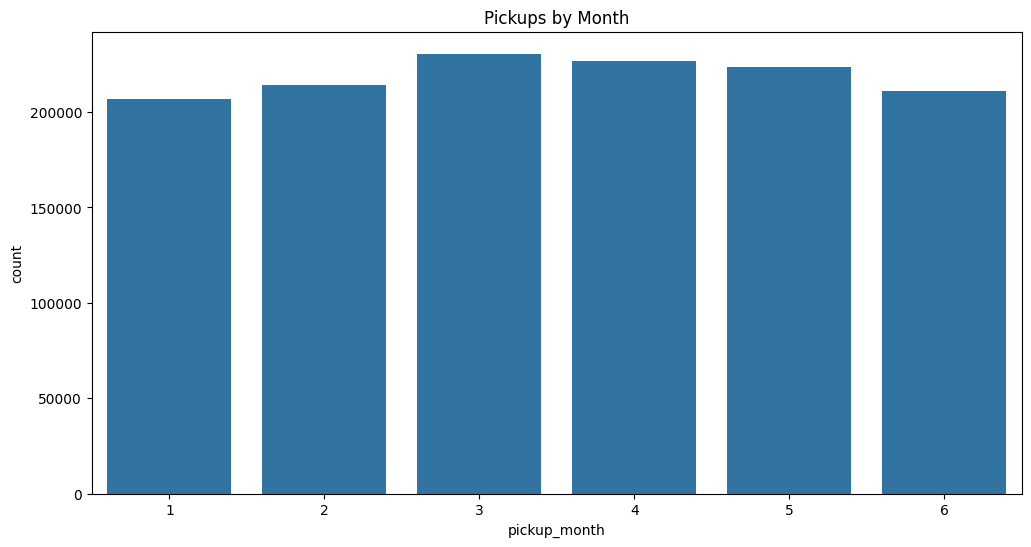

In [25]:
plt.figure(figsize=(12, 6))

sns.countplot(x='pickup_hour', data=df)
plt.title('Pickups by Hour')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_day_of_week', data=df)
plt.title('Pickups by Day of the Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_month', data=df)
plt.title('Pickups by Month')
plt.show()

Pickup hour: The plot shows the variation in this feature throughout the day with peaks during evening. It is essential for this training.  
Pickup Day: By this feature we can estimate on which days of week there is a high demand for the taxi.
Pickup month: It helps in seasonal demand analysis of the taxi rides.

Plot for Dropoff features

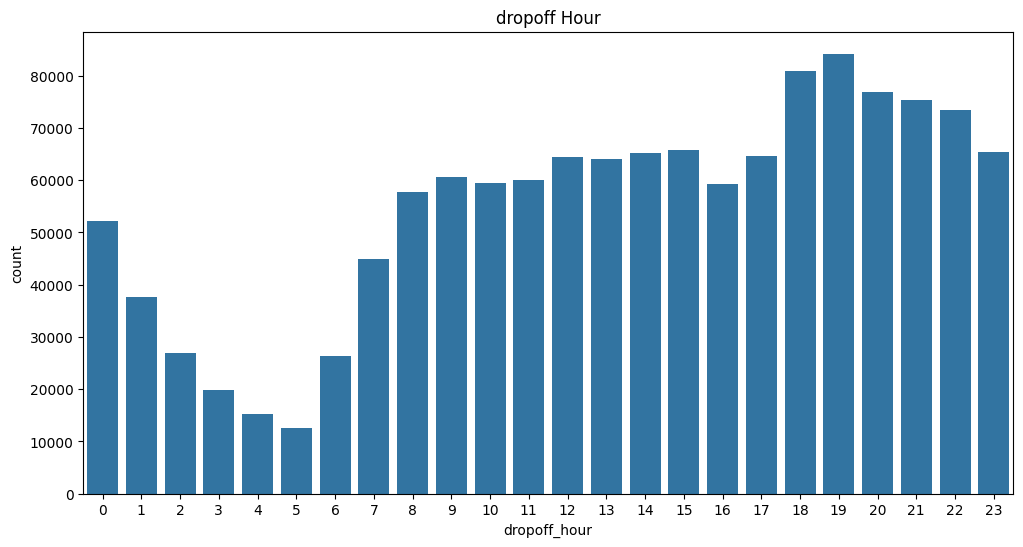

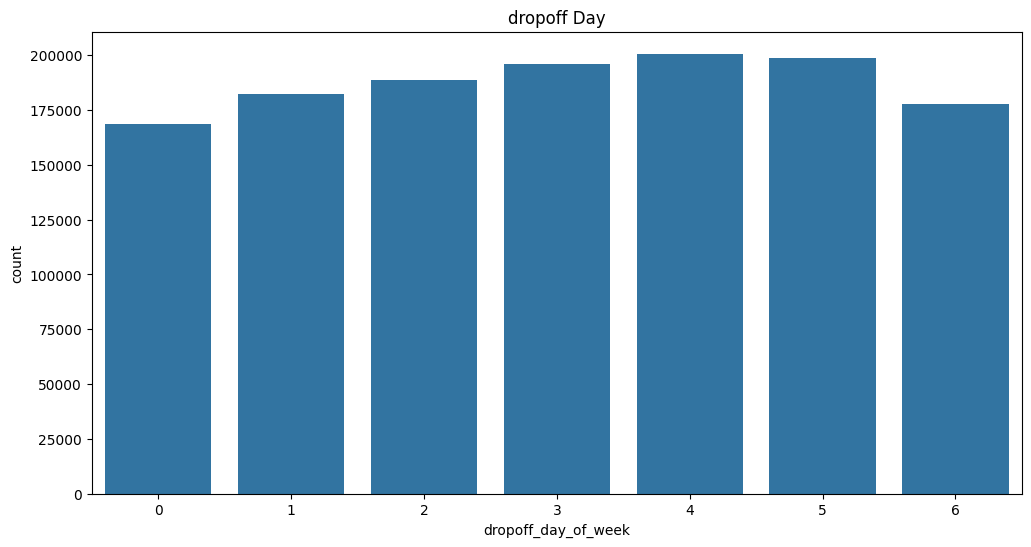

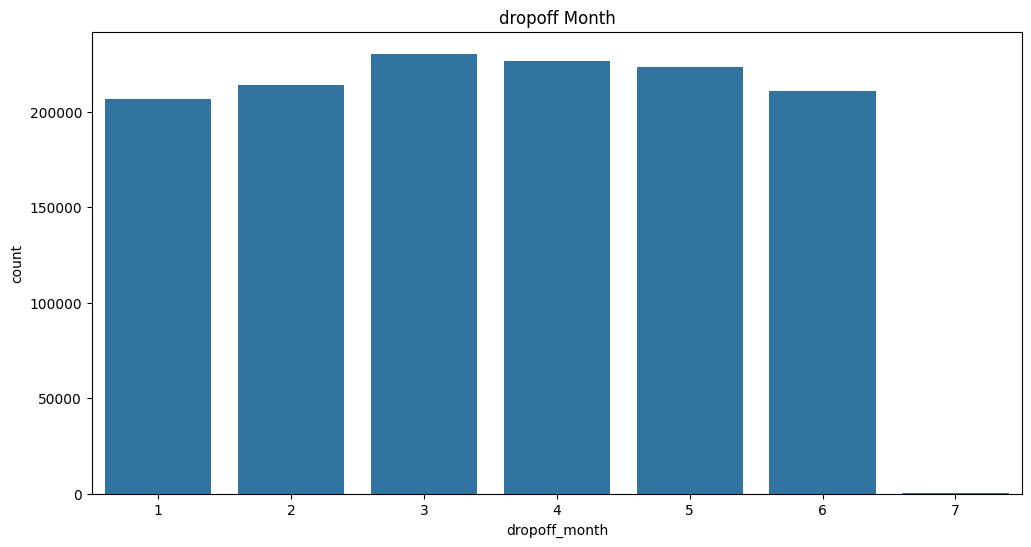

In [26]:
plt.figure(figsize=(12, 6))

sns.countplot(x='dropoff_hour', data=df)
plt.title('dropoff Hour')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='dropoff_day_of_week', data=df)
plt.title('dropoff Day')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='dropoff_month', data=df)
plt.title('dropoff Month')
plt.show()

In [ ]:
#run this cell if haversine is not pre installed
pip install haversine


In [ ]:
from haversine import haversine

def dist(x):
    p = (x['pickup_latitude'], x['pickup_longitude'])
    d = (x['dropoff_latitude'], x['dropoff_longitude'])
    return haversine(p, d)
df['trip_distance'] = df.apply(dist, axis=1)


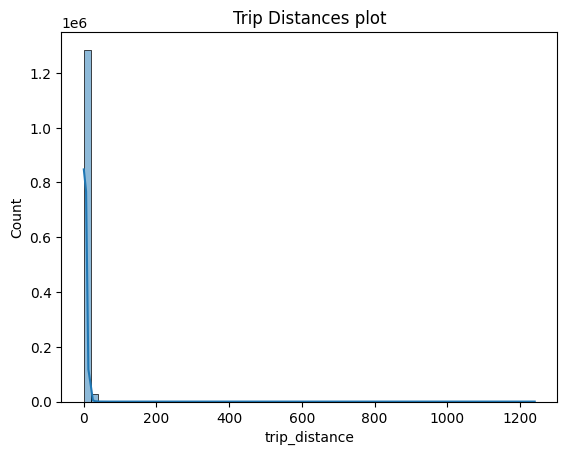

In [30]:
sns.histplot(df['trip_distance'], bins = 65,kde=True)
plt.title('Trip Distances plot')
plt.show()

The Trip distance calculation helps to get the distances travelled. This helps to understand patterns and predict the demand.